In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from Bio import SeqIO
from Bio.Data import CodonTable

In [2]:
#%%%%%%%%%%%%%%%#
### FUNCTIONS ###
#%%%%%%%%%%%%%%%#

## 1 ##
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.


def get_sequences_from_file(fasta_fn): # write a function to get sequences from the fast_fn file
    sequence_data_dict = {} # create a directory for all the sequence files
    for record in SeqIO.parse(fasta_fn, "fasta"): # a loop that goes over each fasta file and identifys the sequences 
        description = record.description.split() # split the words in the description
        species_name = description[1] + " " + description[2] # pull out the species name 
        sequence_data_dict[species_name] = record.seq # connect the species name and the corresponding sequence
    return(sequence_data_dict) #end function and return the value generated from the function

In [3]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
# this should work using BioPython (be sure to check what this returns)

def translate_function(string_nucleotides):# table of codons
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    string_aa = "" #string for amino acid sequence
    for i in range(0, len(string_nucleotides), 3): # loop over each 3rd position in string_nucleotides 
        #to get the codon using range subsets
        codon = string_nucleotides[i:i+3] # extract the codon 
        if codon in mito_table.stop_codons:  # if there is a stop codon, break the loop
            return string_aa
         # translate codon to an amino acid using the generated codon table
        aa = mito_table.forward_table[codon]   
        string_aa += aa  # assign the generated amino acid to aa_seq_string
    return string_aa  # return the sequence

print(CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"])



Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [4]:
# Test the function with an example sequence
# The example sequence is the first string from the penguin fasta file
ex_seq = 'ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA' 
translated_seq = translate_function(ex_seq) # apply new function to translate the example sequence
print(translated_seq)

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH


In [9]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

# used Bio.Seq 
# https://biopython.org/docs/1.75/api/Bio.Seq.html

from Bio.Seq import Seq

def translate_function2(string_nucleotides, codon_table_name="Vertebrate Mitochondrial"):
    mito_table = CodonTable.unambiguous_dna_by_name[codon_table_name]
    seq = Seq(string_nucleotides) # convert the string of nucleotides into a Bio.Seq object
    aa_seq = seq.translate(table=mito_table, to_stop=True) # translate the nucleotide sequence
    return str(aa_seq)


trans_seq = translate_function2(ex_seq) # apply function to example sequence
print(trans_seq)


MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH


In [8]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:

#resource: https://biopython.org/docs/1.76/api/Bio.SeqUtils.ProtParam.html

# I used the example aa sequence (trans_seq) to ensure this code worked
from Bio.SeqUtils.ProtParam import ProteinAnalysis 
def compute_molecular_weight(trans_seq): #define the function
    analysed_seq = ProteinAnalysis(trans_seq) #generate a ProteinAnalysis object
    wt = analysed_seq.molecular_weight() # calculate the molecular weight of the aa 
    return(wt)
compute_molecular_weight(trans_seq) # test the translation function

42459.6021

In [10]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

# here is the resource I used for this section: https://github.com/nextgenusfs/funannotate/issues/1000

from Bio.SeqUtils import gc_fraction
def GC(ex_seq): # define the function GC
    return 100 * gc_fraction(ex_seq, ambiguous="ignore") # calculate the gc content as a fraction
# multiply by 100 to get a percentage

GC(ex_seq)
   

48.38145231846019

In [11]:
#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)


In [12]:
cytb_seqs

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

In [13]:
## 6 ## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.
penguins_df["molecular weight"] = "NaN" 
penguins_df["GC content"] = "NaN" 
penguins_df


,species,mass,molecular weight,GC content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


In [14]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

row_info = 0 # the first row is at row 0
for key, value in cytb_seqs.items():
    aa_seq2 = translate_function(value) # translate the sequences in the provided fasta file
    mol_wt = compute_molecular_weight(aa_seq2)  # find the molecular weight of each aa sequence
    GC_cont = GC(value) # get the GC content of the aa sequences
    
    # Fill in the new rows added in question 6 to the penguins_df
    penguins_df.at[row_info, 'GC content'] = GC_cont
    penguins_df.at[row_info, 'molecular weight'] = mol_wt
    row_info += 1 # row_info increases by 1

In [15]:
penguins_df

,species,mass,molecular weight,GC content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.614,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.549,48.293963


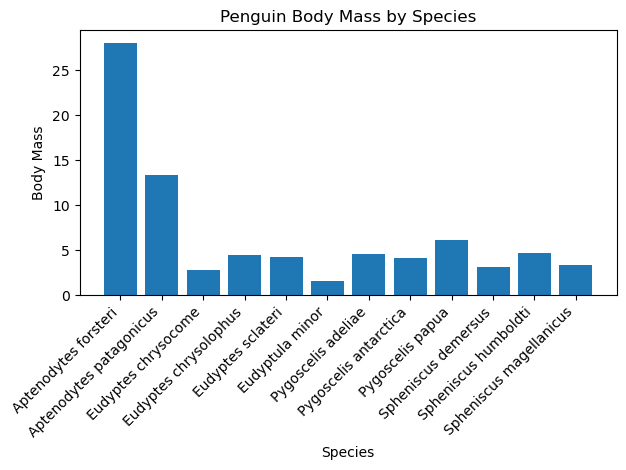

In [16]:
## 8. Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: 

# pull out the columns of interest for the bar chart
species = penguins_df['species'] 
mass = penguins_df['mass']

# plot the species along the x-axis and the body mass along the y axis
plt.bar(species, mass)
plt.xticks(range(len(species)), species, rotation=45, ha='right') 
# since the dataframe begum at 0, I had to change the range of the x lables to start at the beginning of the dataset
# otherwise the ticks were 1 column off

# add labels and plot
plt.xlabel('Species')
plt.ylabel('Body Mass')
plt.title('Penguin Body Mass by Species')
plt.tight_layout()
plt.show()


In [17]:
#       a. What is the smallest penguin species? 
# Eudyptula minor
#       b. What is the geographical range of this species?
# the "little penguin" is only found in Australia and New Zealand

#https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/eudyptula-minor

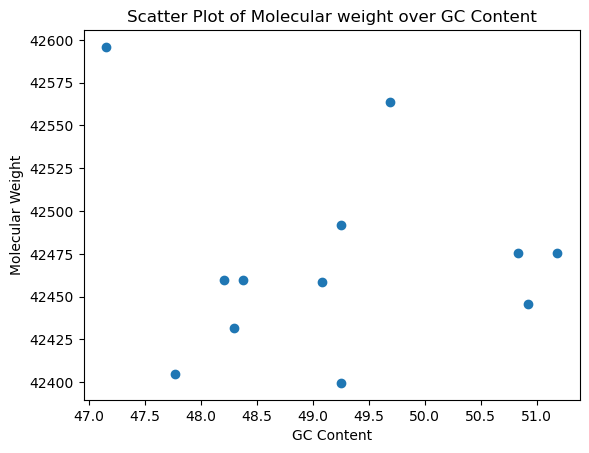

In [18]:
## 9. Plot a graph that shows the molecular weight as a function of GC content. 
# pull out the columns of interest for the scatterplot
mw = penguins_df['molecular weight']
gc = penguins_df['GC content']

# plot GC content as x and molecular weight as the y
# add labels
plt.scatter(gc, mw)
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight')
plt.title('Scatter Plot of Molecular weight over GC Content')
plt.show()

In [19]:
## 10. Write the entire DataFrame to a new CSV file that includes your new columns.

import csv
penguins_df.to_csv("penguins_data.csv")
